In [ ]:
import os
import datetime
import timeit

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras import optimizers
from pandas.core.frame import DataFrame
from tensorflow.keras.optimizers import Adam
import math


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

start = timeit.default_timer()

In [ ]:
from pandas.core.frame import DataFrame
import pandas as pd
import math


class Src:

    def __init__(self, name: str = 'https://raw.githubusercontent.com/isu92neth/Weather-RNN/main/weatherHistory.csv'):
      
        self.name = name
        self.df = DataFrame()

        self.train_df = DataFrame()
        self.test_df = DataFrame()
        self.val_df = DataFrame()

        self.titles = ['Date', 'Summary', 'Precip Type', 'Temperature',
                       'Apparent Temperature', 'Humidity', 'Wind Speed',
                       'Wind Bearing', 'Visibility', 'Loud Cover',
                       'Pressure', 'Daily Summary']

    def load(self) -> DataFrame:
        # load hungarian dataset
        df = pd.read_csv(self.name)
        assert df is not None, 'file error'
        assert len(df) > 0, 'file is empty'
        # set up titles

        df.columns = self.titles

        # index form
        df['Date'] = pd.to_datetime(df['Date'], utc=True)
        df = df.set_index('Date')

        # sort
        self.df = df.sort_index()

        return self.df

    def remove_Unnecessary_Input(self) -> DataFrame:
        del self.df['Summary']
        del self.df['Precip Type']
        del self.df['Daily Summary']
        del self.df['Loud Cover']

        return self.df

    def average(self, interval: int = 7*24) -> DataFrame:
        # average every 6h
        df = DataFrame(columns=self.df.keys())
        # print(self.df['Temperature'])
        for x in range(math.floor(len(self.df) / interval)):
            # tem =

            tem = self.df[:][x * interval:(x + 1) * interval]
            date = pd.to_datetime(tem.index.values[0])

            average = tem.mean().values.T
            tem_entry = DataFrame([average], columns=self.df.keys(), index=[date])
            tem_frame = [df, tem_entry]
            df = pd.concat(tem_frame)

        self.df = df

        return self.df

   

    def run_Src(self):

        df = self.load()
        self.remove_Unnecessary_Input()
        return self.average()

In [ ]:
file = Src()
df = file.run_Src()

In [ ]:
df = df['Temperature']
df

2005-12-31 23:00:00    2.869709
2006-01-07 23:00:00   -0.929332
2006-01-14 23:00:00   -1.633003
2006-01-21 23:00:00   -7.578902
2006-01-28 23:00:00   -1.924173
                         ...   
2016-11-26 02:00:00    3.106878
2016-12-03 02:00:00    2.190972
2016-12-10 02:00:00    1.407705
2016-12-17 02:00:00    0.767659
2016-12-24 02:00:00    0.280688
Name: Temperature, Length: 574, dtype: float64

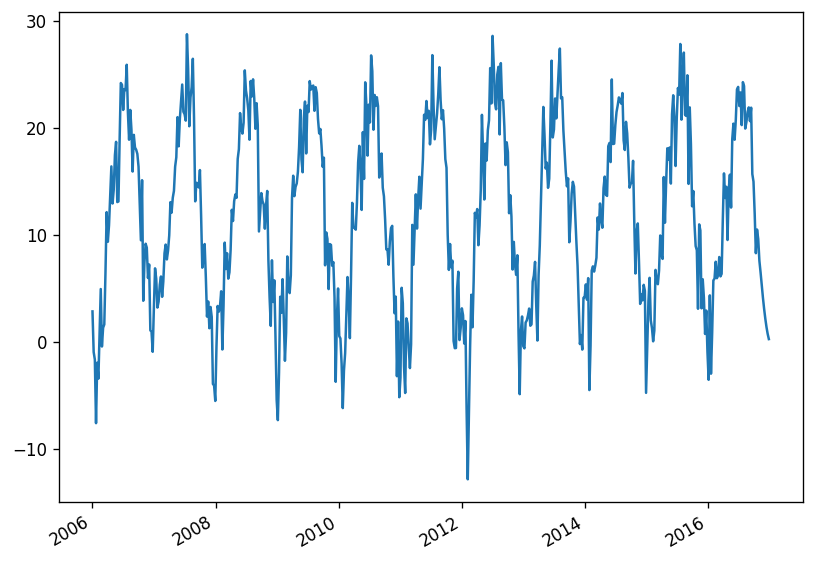

In [ ]:
_ = df.plot(subplots=True)

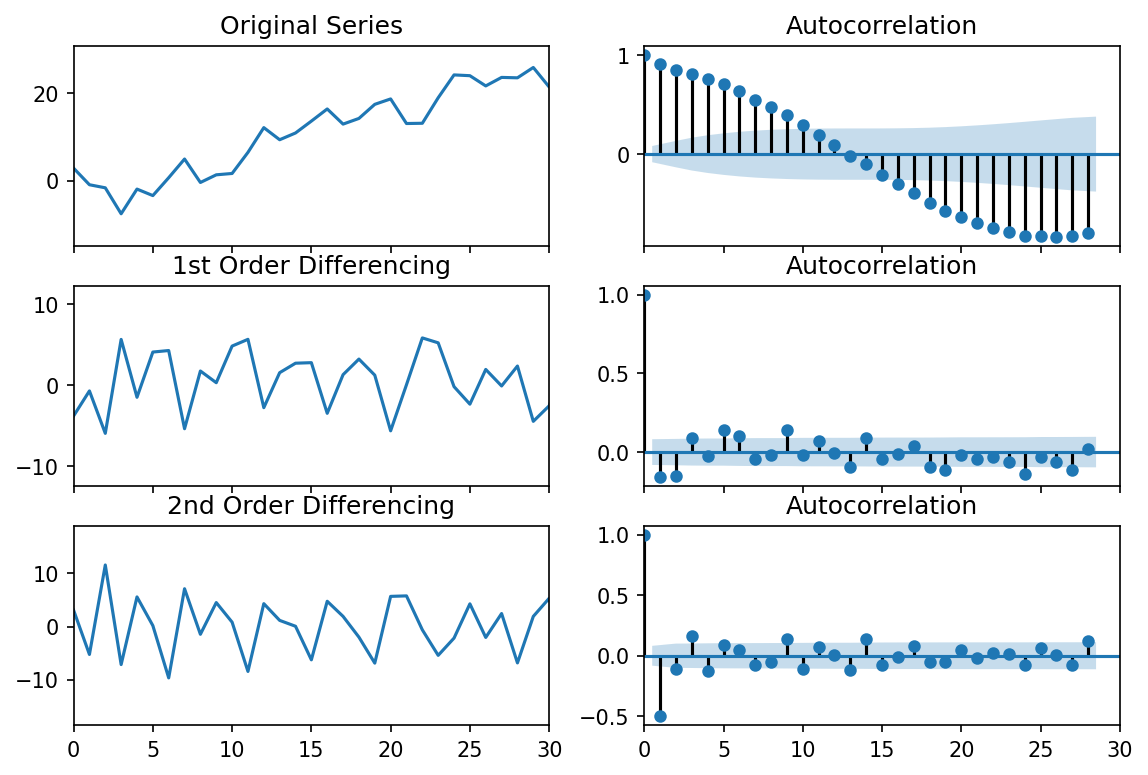

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':150})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.values); axes[0, 0].set_title('Original Series')
axes[0,1].set(xlim=(0,30))
plot_acf(df.dropna(), ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(df.values)); axes[1, 0].set_title('1st Order Differencing')
axes[1,1].set(xlim=(0,30))
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(np.diff(np.diff(df.values))); axes[2, 0].set_title('2nd Order Differencing')
axes[2,1].set(xlim=(0,30))
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])


plt.show()

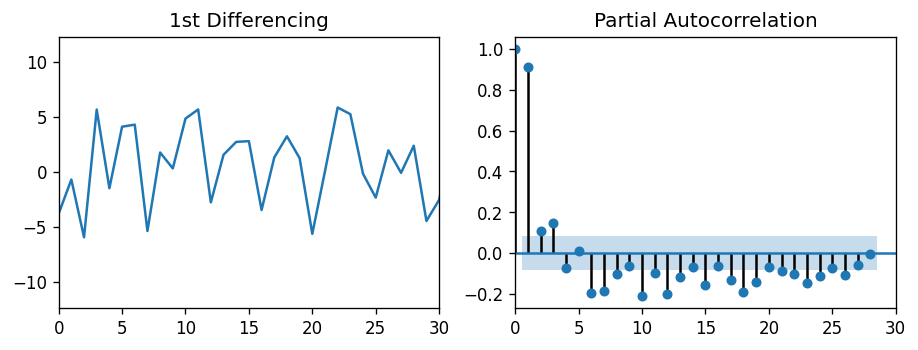

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(np.diff(df.values)); axes[0].set_title('1st Differencing')
axes[1].set(xlim=(0,30))
plot_pacf(df.dropna(), ax=axes[1])

plt.show()

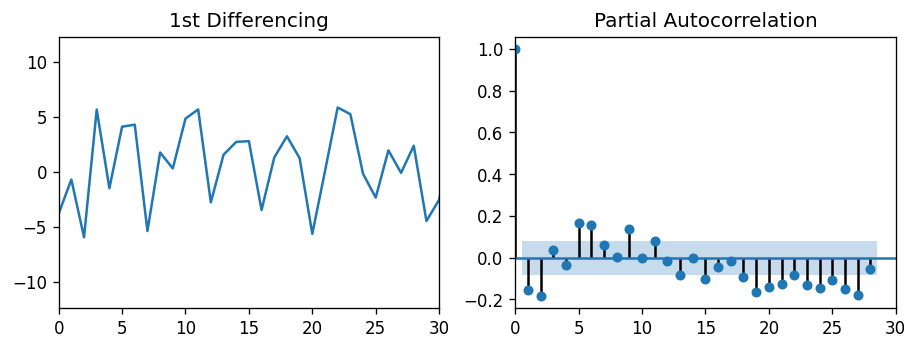

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(np.diff(df.values)); axes[0].set_title('1st Differencing')
axes[1].set(xlim=(0,30))
plot_pacf(df.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -12.074974745318155
p-value: 2.3013571674666e-22


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.diff().dropna(), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -7.304519450411105
p-value: 1.312118422416194e-10


In [ ]:
X = df.values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]

#normalizing
train_mean = train.mean()
train_std = train.std()

train = (train - train_mean) / train_std
test = (test - train_mean) / train_std

history = [x for x in train]


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
'''model = ARIMA(history, order=(1,0,3))
model_fit = model.fit()'''

'model = ARIMA(history, order=(1,0,3))\nmodel_fit = model.fit()'

predicted=-0.390223, expected=-1.040922
predicted=-0.762971, expected=-0.721986
predicted=-0.588961, expected=-0.927445
predicted=-0.925634, expected=-1.322040
predicted=-1.126918, expected=-1.065033
predicted=-1.002696, expected=-1.519323
predicted=-1.426947, expected=-1.824474
predicted=-1.571622, expected=-0.898280
predicted=-0.970422, expected=-1.757406
predicted=-1.712069, expected=-1.305982
predicted=-1.074316, expected=-0.735054
predicted=-0.946102, expected=-0.713918
predicted=-0.708956, expected=-0.529642
predicted=-0.518604, expected=-0.710179
predicted=-0.636193, expected=-0.678404
predicted=-0.577217, expected=-0.477887
predicted=-0.494347, expected=-0.690231
predicted=-0.646070, expected=-0.662730
predicted=-0.578464, expected=-0.069696
predicted=-0.182548, expected=0.438935
predicted=0.222251, expected=0.169225
predicted=0.140105, expected=0.292197
predicted=0.353392, expected=-0.291586
predicted=-0.207534, expected=0.255597
predicted=0.289812, expected=0.424576
predicted

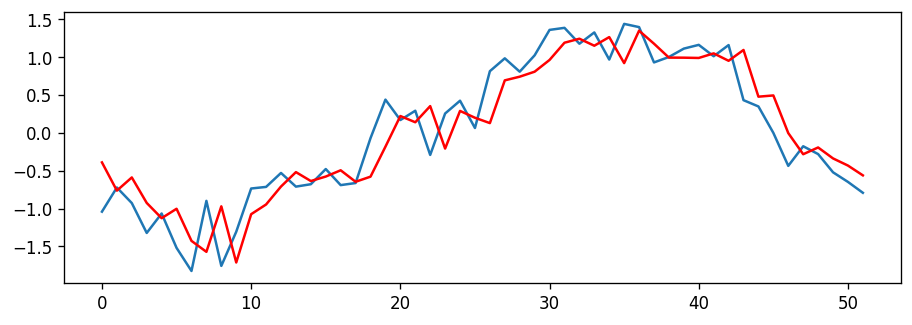

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  567
Model:                     ARMA(1, 3)   Log Likelihood                -281.871
Method:                       css-mle   S.D. of innovations              0.397
Date:                Fri, 13 May 2022   AIC                            575.743
Time:                        09:52:38   BIC                            601.785
Sample:                             0   HQIC                           585.906
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0441      0.234     -0.189      0.850      -0.502       0.414
ar.L1.y        0.9422      0.016     59.441      0.000       0.911       0.973
ma.L1.y       -0.1639      0.046     -3.552      0.0

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

predictions = list()
test = test[:52]

for t in range(len(test)):
	model = ARIMA(history, order=(1,0,3))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mse = (mean_squared_error(test, predictions))
print('Test MSE: %.3f' % mse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
print(model_fit.summary())

In [ ]:
end = timeit.default_timer()
print(end-start)

16.727161014999638
